In [1]:
import sys
sys.path.append('../')
from common.GeneticAlgorithm import GeneticAlgorithm
import numpy as np
import math

my_data = np.load('A.npz')
bag_capacity = int(my_data['capacity'])
n_items = int(my_data['n_items'])
item_values = my_data['item_values']
item_weights = my_data['item_weights']
print(bag_capacity)
def fitness_func(total_pop):
    fitness = total_pop @ item_values
    return -fitness
def calc_weights(pop):
    return pop @ item_weights
def environmental_constraint(pop):
    weights = calc_weights(pop)
    idx = (weights <= bag_capacity)
    return pop[idx]

20


# Experiment 1: Higher Mutation Delta
Mutation Range = (-1,1), 
Random Uniformly chosen from range, and then rounded to mutate 50% of offspring 

In [2]:
PARAM_SIZE = n_items
POP_SIZE = 10
LOW_BOUND = 0
HIGH_BOUND = 1
NUM_GENERATIONS = 5000
genetic_alg = GeneticAlgorithm(
    PARAM_SIZE, 
    POP_SIZE, 
    LOW_BOUND, 
    HIGH_BOUND, 
    fitness_func,
    environmental_constraint,
    discrete = True
)
# genetic_alg.crossover_idx = 0
genetic_alg.mutation_center = 0
genetic_alg.mutation_delta = 1
genetic_alg.initial_high_bound = 0.51
genetic_alg.run(NUM_GENERATIONS)

Generation : 0
Best result in current iteration -10.0 compared to overall -10.0
Generation : 1
Best result in current iteration -15.0 compared to overall -15.0
Generation : 2
Best result in current iteration -24.0 compared to overall -24.0
Generation : 3
Best result in current iteration -24.0 compared to overall -24.0
Generation : 4
Best result in current iteration -24.0 compared to overall -24.0
Generation : 5
Best result in current iteration -24.0 compared to overall -24.0
Generation : 6
Best result in current iteration -24.0 compared to overall -24.0
Generation : 7
Best result in current iteration -25.0 compared to overall -25.0
Generation : 8
Best result in current iteration -25.0 compared to overall -25.0
Generation : 9
Best result in current iteration -25.0 compared to overall -25.0
Generation : 10
Best result in current iteration -25.0 compared to overall -25.0
Generation : 11
Best result in current iteration -28.0 compared to overall -28.0
Generation : 12
Best result in current

## Results Analysis:
Many offspring go out of the environmental constraint due to the larger likelihood of going outside of the weight limit from the higher mutation delta

In [3]:
print(genetic_alg.best_solution)
print(calc_weights(genetic_alg.best_solution))
print(fitness_func(genetic_alg.best_solution))

[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0.]
20.0
-74.0


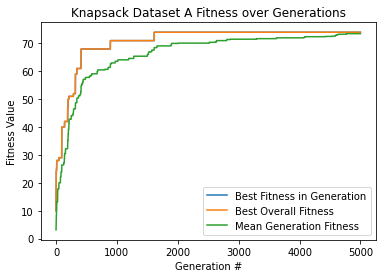

In [8]:
genetic_alg.plot_knapsack("Knapsack Dataset A")

# Experiment 2: Higher Bound and  lower mutation delta

In [5]:
PARAM_SIZE = n_items
POP_SIZE = 10
LOW_BOUND = 0
HIGH_BOUND = 1
NUM_GENERATIONS = 5000
genetic_alg2 = GeneticAlgorithm(
    PARAM_SIZE, 
    POP_SIZE, 
    LOW_BOUND, 
    HIGH_BOUND, 
    fitness_func,
    environmental_constraint,
    discrete = True
)
# genetic_alg.crossover_idx = 0
genetic_alg2.mutation_center = 0
genetic_alg2.mutation_delta = 0.55 # kind of like learning rate
genetic_alg2.initial_high_bound = 0.51
genetic_alg2.run(NUM_GENERATIONS)

Generation : 0
Best result in current iteration -25.0 compared to overall -25.0
Generation : 1
Best result in current iteration -25.0 compared to overall -25.0
Generation : 2
Best result in current iteration -25.0 compared to overall -25.0
Generation : 3
Best result in current iteration -25.0 compared to overall -25.0
Generation : 4
Best result in current iteration -25.0 compared to overall -25.0
Generation : 5
Best result in current iteration -25.0 compared to overall -25.0
Generation : 6
Best result in current iteration -25.0 compared to overall -25.0
Generation : 7
Best result in current iteration -32.0 compared to overall -32.0
Generation : 8
Best result in current iteration -32.0 compared to overall -32.0
Generation : 9
Best result in current iteration -32.0 compared to overall -32.0
Generation : 10
Best result in current iteration -43.0 compared to overall -43.0
Generation : 11
Best result in current iteration -43.0 compared to overall -43.0
Generation : 12
Best result in current

## Results Analysis
Slightly better results than experiment 1

In [6]:
print(genetic_alg2.best_solution)
print(calc_weights(genetic_alg2.best_solution))
print(fitness_func(genetic_alg2.best_solution))

[0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0.]
20.0
-78.0


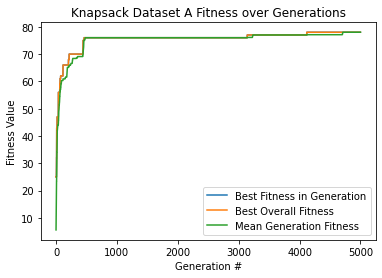

In [9]:
genetic_alg2.plot_knapsack("Knapsack Dataset A")